### **Problem Statement**

##### - Predicting each score (Regression)



**Import Libraries**

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# # mac
# data = pd.read_csv('/Users/azel/Documents/GitHub/Azel-s-DAC-Curriculum/Internal-Project/Students_Performance.csv') 

#windows
data = pd.read_csv('C:/Users/azelt/OneDrive/Documents/GitHub/Azel-s-DAC-Curriculum/Internal-Project/Students_Performance.csv') 

### **Classification**

Classification Report:
              precision    recall  f1-score   support

        high       0.20      0.03      0.06        29
         low       0.48      0.34      0.40        62
      medium       0.56      0.78      0.65       109

    accuracy                           0.54       200
   macro avg       0.41      0.38      0.37       200
weighted avg       0.48      0.54      0.49       200



c:\Users\azelt\OneDrive\Documents\GitHub\Azel-s-DAC-Curriculum\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


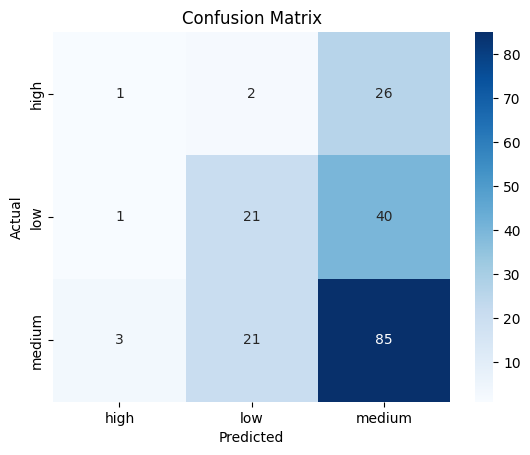

In [3]:
# Step 1: Define categories for average score
def categorize_performance(score):
    if score < 60:
        return 'low'
    elif 60 <= score <= 80:
        return 'medium'
    else:
        return 'high'

data['average score'] = data[['math score', 'reading score', 'writing score']].mean(axis=1)
data['performance_category'] = data['average score'].apply(categorize_performance)

# Step 2: Encode the target variable (low, medium, high)
label_encoder = LabelEncoder()
data['performance_label'] = label_encoder.fit_transform(data['performance_category'])

# Step 3: Define features and target
X = data.drop(columns=['math score', 'reading score', 'writing score', 'average score', 
                       'performance_category', 'performance_label'])
y = data['performance_label']

# Encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Step 5: Train logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

==================================================================================================================================================

In [4]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Ensure data is numeric
X_train = X_train.astype(float)  # Convert features to float
y_train = y_train.astype(int)    # Ensure target is integer

# Convert to numpy arrays
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()

# Debugging: Inspect shapes and types
print("X_train_np shape:", X_train_np.shape)
print("y_train_np shape:", y_train_np.shape)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_np, y_train_np)
print("SMOTE applied successfully!")


X_train_np shape: (800, 12)
y_train_np shape: (800,)
SMOTE applied successfully!


In [5]:
# Train Logistic Regression on oversampled data
oversampled_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
oversampled_model.fit(X_resampled, y_resampled)

# Make predictions and evaluate
y_pred_oversampled = oversampled_model.predict(X_test)
oversampled_report = classification_report(y_test, y_pred_oversampled, target_names=label_encoder.classes_)

# Print the classification report
print("Classification Report for Oversampled Data:")
print(oversampled_report)


Classification Report for Oversampled Data:
              precision    recall  f1-score   support

        high       0.30      0.83      0.44        29
         low       0.51      0.68      0.58        62
      medium       0.64      0.23      0.34       109

    accuracy                           0.46       200
   macro avg       0.49      0.58      0.46       200
weighted avg       0.55      0.46      0.43       200



c:\Users\azelt\OneDrive\Documents\GitHub\Azel-s-DAC-Curriculum\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\azelt\OneDrive\Documents\GitHub\Azel-s-DAC-Curriculum\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [7]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support, classification_report

# Step 1: Get predicted probabilities
y_proba = oversampled_model.predict_proba(X_test)

# Step 2: Adjust thresholds
# Define thresholds for each class
thresholds = [0.5, 0.5, 0.5]  # Default thresholds for high, low, medium

# Create custom predictions based on thresholds
y_pred_custom = []
for prob in y_proba:
    if prob[0] >= thresholds[0]:  # High
        y_pred_custom.append(0)
    elif prob[1] >= thresholds[1]:  # Low
        y_pred_custom.append(1)
    else:  # Medium
        y_pred_custom.append(2)

# Step 3: Evaluate custom predictions
print("Custom Classification Report:")
print(classification_report(y_test, y_pred_custom, target_names=label_encoder.classes_))


Custom Classification Report:
              precision    recall  f1-score   support

        high       0.32      0.45      0.37        29
         low       0.51      0.47      0.49        62
      medium       0.57      0.53      0.55       109

    accuracy                           0.50       200
   macro avg       0.46      0.48      0.47       200
weighted avg       0.51      0.50      0.50       200



c:\Users\azelt\OneDrive\Documents\GitHub\Azel-s-DAC-Curriculum\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [8]:
# Define a function to optimize thresholds
def tune_thresholds(y_test, y_proba, target_names, step=0.05):
    best_f1 = 0
    best_thresholds = [0.5, 0.5, 0.5]
    
    for t1 in np.arange(0.1, 1.0, step):
        for t2 in np.arange(0.1, 1.0, step):
            for t3 in np.arange(0.1, 1.0, step):
                thresholds = [t1, t2, t3]
                y_pred_custom = []
                for prob in y_proba:
                    if prob[0] >= thresholds[0]:  # High
                        y_pred_custom.append(0)
                    elif prob[1] >= thresholds[1]:  # Low
                        y_pred_custom.append(1)
                    else:  # Medium
                        y_pred_custom.append(2)
                
                # Evaluate metrics
                precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_custom, average='weighted')
                if f1 > best_f1:
                    best_f1 = f1
                    best_thresholds = thresholds
    
    return best_thresholds, best_f1

# Tune thresholds
optimal_thresholds, optimal_f1 = tune_thresholds(y_test, y_proba, label_encoder.classes_)
print("Optimal Thresholds:", optimal_thresholds)
print("Optimal Weighted F1-Score:", optimal_f1)


c:\Users\azelt\OneDrive\Documents\GitHub\Azel-s-DAC-Curriculum\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\azelt\OneDrive\Documents\GitHub\Azel-s-DAC-Curriculum\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\azelt\OneDrive\Documents\GitHub\Azel-s-DAC-Curriculum\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

Optimal Thresholds: [np.float64(0.8000000000000002), np.float64(0.40000000000000013), np.float64(0.1)]
Optimal Weighted F1-Score: 0.5516970795007587


c:\Users\azelt\OneDrive\Documents\GitHub\Azel-s-DAC-Curriculum\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\azelt\OneDrive\Documents\GitHub\Azel-s-DAC-Curriculum\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\azelt\OneDrive\Documents\GitHub\Azel-s-DAC-Curriculum\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

Random Forest Classification Report:
              precision    recall  f1-score   support

        high       0.29      0.45      0.35        29
         low       0.33      0.42      0.37        62
      medium       0.52      0.37      0.43       109

    accuracy                           0.40       200
   macro avg       0.38      0.41      0.38       200
weighted avg       0.43      0.40      0.40       200



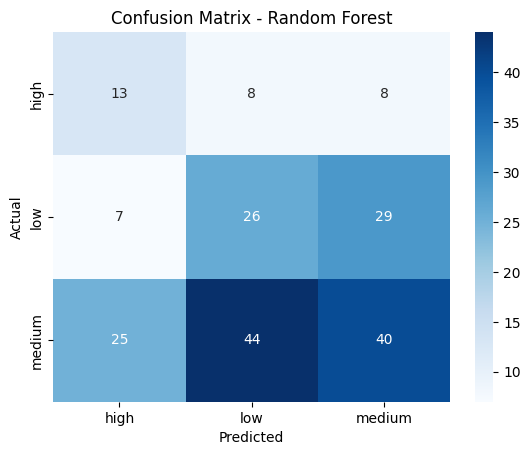


Top 10 Most Important Features:
                                         Feature  Importance
10                                lunch_standard    0.175529
11                  test preparation course_none    0.148548
0                                    gender_male    0.129426
3                         race/ethnicity_group D    0.068561
8       parental level of education_some college    0.067975
9   parental level of education_some high school    0.065088
6        parental level of education_high school    0.063836
2                         race/ethnicity_group C    0.061483
1                         race/ethnicity_group B    0.060958
4                         race/ethnicity_group E    0.060653


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100, max_depth=10)
rf_model.fit(X_train, y_train)

# Step 2: Make Predictions
y_pred_rf = rf_model.predict(X_test)

# Step 3: Evaluate the Model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))

# Step 4: Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Step 5: Feature Importance
feature_importances = rf_model.feature_importances_
feature_names = X_encoded.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(importance_df.head(10))


Random Forest Classification Report (Top Features):
              precision    recall  f1-score   support

        high       0.21      0.52      0.30        29
         low       0.43      0.44      0.43        62
      medium       0.49      0.29      0.37       109

    accuracy                           0.37       200
   macro avg       0.38      0.42      0.37       200
weighted avg       0.43      0.37      0.38       200



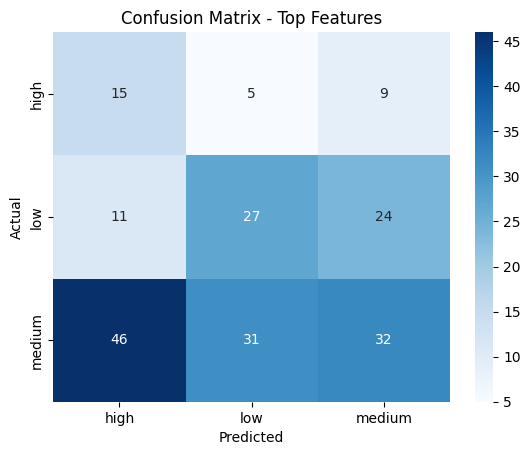

In [10]:
# Step 1: Select only the top 10 features based on importance
top_features = [
    'lunch_standard', 'test preparation course_none', 'gender_male',
    'race/ethnicity_group D', 'parental level of education_some college',
    'parental level of education_some high school', 'parental level of education_high school',
    'race/ethnicity_group C', 'race/ethnicity_group B', 'race/ethnicity_group E'
]
X_top_features = X_encoded[top_features]

# Step 2: Train-test split using only the top features
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(
    X_top_features, y, test_size=0.2, random_state=42
)

# Step 3: Train Random Forest Classifier on top features
rf_model_top = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100, max_depth=10)
rf_model_top.fit(X_train_top, y_train_top)

# Step 4: Make predictions
y_pred_rf_top = rf_model_top.predict(X_test_top)

# Step 5: Evaluate the model
print("Random Forest Classification Report (Top Features):")
print(classification_report(y_test_top, y_pred_rf_top, target_names=label_encoder.classes_))

# Step 6: Confusion Matrix
conf_matrix_rf_top = confusion_matrix(y_test_top, y_pred_rf_top)
sns.heatmap(conf_matrix_rf_top, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Top Features')
plt.show()


Random Forest Classification Report (Engineered Features):
              precision    recall  f1-score   support

        high       0.21      0.52      0.30        29
         low       0.43      0.44      0.43        62
      medium       0.51      0.31      0.39       109

    accuracy                           0.38       200
   macro avg       0.38      0.42      0.37       200
weighted avg       0.44      0.38      0.39       200



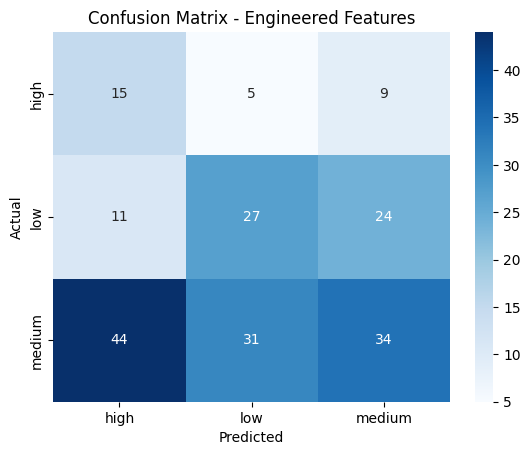

In [12]:
# Step 1: Feature Interaction Engineering
# Create interaction features based on key relationships
X_encoded['lunch_test_prep_interaction'] = X_encoded['lunch_standard'] * X_encoded['test preparation course_none']
X_encoded['parent_edu_race_interaction'] = (
    X_encoded['parental level of education_some college'] +
    X_encoded['parental level of education_some high school'] +
    X_encoded['parental level of education_high school']
) * (
    X_encoded['race/ethnicity_group B'] +
    X_encoded['race/ethnicity_group C']
)

# Select top features and engineered features
selected_features = top_features + [
    'lunch_test_prep_interaction',
    'parent_edu_race_interaction'
]
X_interacted = X_encoded[selected_features]

# Step 2: Train-test split using engineered features
X_train_interacted, X_test_interacted, y_train_interacted, y_test_interacted = train_test_split(
    X_interacted, y, test_size=0.2, random_state=42
)

# Step 3: Train Random Forest Classifier with engineered features
rf_model_interacted = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100, max_depth=10)
rf_model_interacted.fit(X_train_interacted, y_train_interacted)

# Step 4: Make predictions
y_pred_rf_interacted = rf_model_interacted.predict(X_test_interacted)

# Step 5: Evaluate the model
print("Random Forest Classification Report (Engineered Features):")
print(classification_report(y_test_interacted, y_pred_rf_interacted, target_names=label_encoder.classes_))

# Step 6: Confusion Matrix
conf_matrix_rf_interacted = confusion_matrix(y_test_interacted, y_pred_rf_interacted)
sns.heatmap(conf_matrix_rf_interacted, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Engineered Features')
plt.show()


c:\Users\azelt\OneDrive\Documents\GitHub\Azel-s-DAC-Curriculum\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:02:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

        high       0.24      0.24      0.24        29
         low       0.45      0.37      0.41        62
      medium       0.57      0.62      0.59       109

    accuracy                           0.49       200
   macro avg       0.42      0.41      0.41       200
weighted avg       0.48      0.49      0.48       200



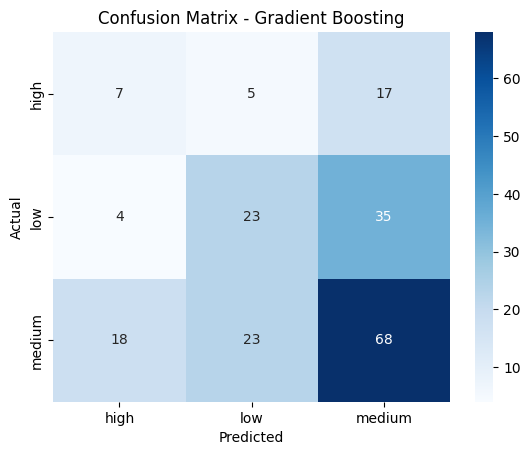

In [13]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Feature Engineering (if not already done)
data['average score'] = data[['math score', 'reading score', 'writing score']].mean(axis=1)

def categorize_performance(score):
    if score < 60:
        return 'low'
    elif 60 <= score <= 80:
        return 'medium'
    else:
        return 'high'

data['performance_category'] = data['average score'].apply(categorize_performance)

# Encode the target variable (if not already done)
label_encoder = LabelEncoder()
data['performance_label'] = label_encoder.fit_transform(data['performance_category'])

# Define features and target
categorical_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
X = data.drop(columns=['math score', 'reading score', 'writing score', 'average score', 'performance_category', 'performance_label'])
y = data['performance_label']

# One-hot encode categorical variables (if not already done)
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Add interaction features (if not already done)
X_encoded['lunch_test_prep_interaction'] = X_encoded['lunch_standard'] * X_encoded['test preparation course_none']
X_encoded['parent_edu_race_interaction'] = (
    X_encoded['parental level of education_some college'] +
    X_encoded['parental level of education_some high school'] +
    X_encoded['parental level of education_high school']
) * (
    X_encoded['race/ethnicity_group B'] +
    X_encoded['race/ethnicity_group C']
)

# Train-test split (if not already done)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train Gradient Boosting Classifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_))

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()


Class Weights: {0: np.float64(1.6161616161616161), 1: np.float64(1.195814648729447), 2: np.float64(0.6472491909385113)}
Gradient Boosting Classification Report (With Class Weights):
              precision    recall  f1-score   support

        high       0.24      0.24      0.24        29
         low       0.45      0.37      0.41        62
      medium       0.57      0.62      0.59       109

    accuracy                           0.49       200
   macro avg       0.42      0.41      0.41       200
weighted avg       0.48      0.49      0.48       200



c:\Users\azelt\OneDrive\Documents\GitHub\Azel-s-DAC-Curriculum\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:05:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


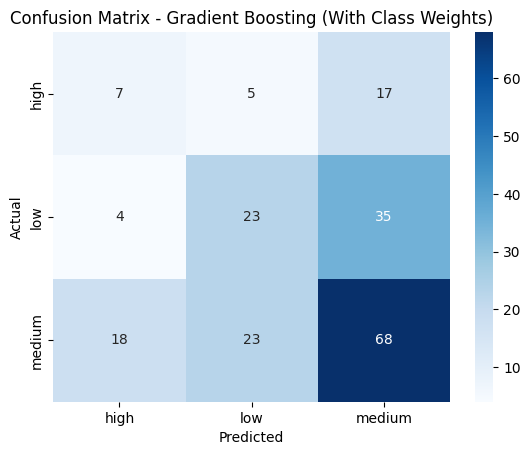

In [14]:
from sklearn.utils.class_weight import compute_class_weight
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Calculate class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}

print("Class Weights:", class_weight_dict)

# Step 2: Train Gradient Boosting Classifier with class weights
xgb_model_weighted = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss',
    scale_pos_weight=[class_weight_dict.get(i, 1) for i in range(len(class_weight_dict))]
)

xgb_model_weighted.fit(X_train, y_train)

# Step 3: Make predictions
y_pred_xgb_weighted = xgb_model_weighted.predict(X_test)

# Step 4: Evaluate the model
print("Gradient Boosting Classification Report (With Class Weights):")
print(classification_report(y_test, y_pred_xgb_weighted, target_names=label_encoder.classes_))

# Step 5: Confusion Matrix
conf_matrix_xgb_weighted = confusion_matrix(y_test, y_pred_xgb_weighted)
sns.heatmap(conf_matrix_xgb_weighted, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gradient Boosting (With Class Weights)')
plt.show()


c:\Users\azelt\OneDrive\Documents\GitHub\Azel-s-DAC-Curriculum\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:08:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Gradient Boosting Classification Report (With SMOTE):
              precision    recall  f1-score   support

        high       0.24      0.31      0.27        29
         low       0.39      0.37      0.38        62
      medium       0.57      0.54      0.55       109

    accuracy                           0.46       200
   macro avg       0.40      0.41      0.40       200
weighted avg       0.47      0.46      0.46       200



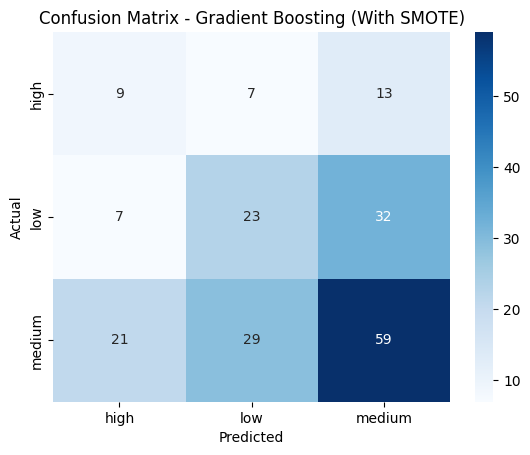

In [16]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Ensure numeric data
X_train = X_train.astype(float)
X_test = X_test.astype(float)

# Step 2: Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Step 3: Train Gradient Boosting (XGBoost) Classifier
xgb_model_smote = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model_smote.fit(X_resampled, y_resampled)

# Step 4: Make predictions
y_pred_xgb_smote = xgb_model_smote.predict(X_test)

# Step 5: Evaluate the model
print("Gradient Boosting Classification Report (With SMOTE):")
print(classification_report(y_test, y_pred_xgb_smote, target_names=label_encoder.classes_))

# Step 6: Confusion Matrix
conf_matrix_xgb_smote = confusion_matrix(y_test, y_pred_xgb_smote)
sns.heatmap(conf_matrix_xgb_smote, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gradient Boosting (With SMOTE)')
plt.show()


Class Weights After SMOTE: {0: np.float64(1.0), 1: np.float64(1.0), 2: np.float64(1.0)}
Gradient Boosting Classification Report (With SMOTE and Class Weights):
              precision    recall  f1-score   support

        high       0.24      0.31      0.27        29
         low       0.39      0.37      0.38        62
      medium       0.57      0.54      0.55       109

    accuracy                           0.46       200
   macro avg       0.40      0.41      0.40       200
weighted avg       0.47      0.46      0.46       200



c:\Users\azelt\OneDrive\Documents\GitHub\Azel-s-DAC-Curriculum\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:10:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


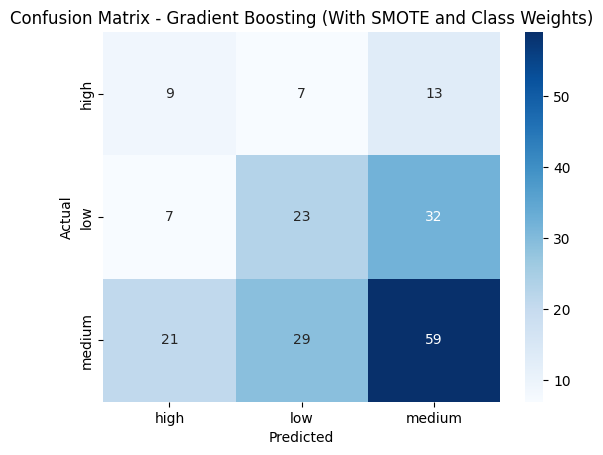

In [17]:
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Step 2: Compute Class Weights for Resampled Data
class_weights_resampled = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_resampled),
    y=y_resampled
)
class_weight_dict_resampled = {i: weight for i, weight in enumerate(class_weights_resampled)}

print("Class Weights After SMOTE:", class_weight_dict_resampled)

# Step 3: Train XGBoost with Combined SMOTE and Class Weights
xgb_model_smote_weighted = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss',
    scale_pos_weight=[class_weight_dict_resampled.get(i, 1) for i in range(len(class_weight_dict_resampled))]
)

xgb_model_smote_weighted.fit(X_resampled, y_resampled)

# Step 4: Make predictions on the original test set
y_pred_xgb_smote_weighted = xgb_model_smote_weighted.predict(X_test)

# Step 5: Evaluate the model
print("Gradient Boosting Classification Report (With SMOTE and Class Weights):")
print(classification_report(y_test, y_pred_xgb_smote_weighted, target_names=label_encoder.classes_))

# Step 6: Confusion Matrix
conf_matrix_xgb_smote_weighted = confusion_matrix(y_test, y_pred_xgb_smote_weighted)
sns.heatmap(conf_matrix_xgb_smote_weighted, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gradient Boosting (With SMOTE and Class Weights)')
plt.show()


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000078 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 28
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 14
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

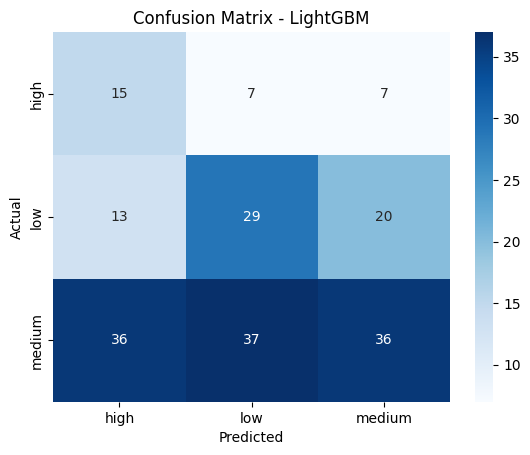

In [19]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train LightGBM Classifier
lgbm_model = LGBMClassifier(random_state=42, class_weight='balanced')
lgbm_model.fit(X_train, y_train)

# Make predictions
y_pred_lgbm = lgbm_model.predict(X_test)

# Evaluate the model
print("LightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgbm, target_names=label_encoder.classes_))

# Confusion Matrix
conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)
sns.heatmap(conf_matrix_lgbm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - LightGBM')
plt.show()
